In [52]:
from question4 import *
from comet_ml import Experiment
import os
from etape2_Q3 import *
import numpy as np
from sklearn.calibration import CalibrationDisplay
from sklearn.tree import DecisionTreeClassifier
from matplotlib.gridspec import GridSpec

In [53]:
my_key = os.environ.get("COMET_API_KEY")

In [54]:
exp = Experiment(api_key=my_key, project_name='ift-6758-a22', workspace='teylouniseifu' )

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/2893f2519b2842d286862a9a10634ecc
COMET INFO:   Parameters:
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     class_weight             : 1
COMET INFO:     criterion                : gini
COMET INFO:     max_depth                : 2
COMET INFO:     max_features             : 1
COMET INFO:     max_leaf_nodes           : 1
COMET INFO:     min_impurity_decrease    : 0.0
COMET INFO:     min_samples_leaf         : 1
COMET INFO:     min_samples_split        : 2
COMET INFO:     min_weight_fraction_leaf : 0.0
COMET INFO:     random_state             : 1
COMET INFO:     splitter                 : best
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:    

In [55]:
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'

In [56]:
df2015 = create_full_df(directory2015)
df2016 = create_full_df(directory2016)
df2017 = create_full_df(directory2017)
df2018 = create_full_df(directory2018)

In [57]:
df_train = pd.concat([df2015, df2016, df2017], ignore_index=True)
df_val = df2018
df_train = df_train.dropna(subset="Distance")
df_val = df_val.dropna(subset="Distance")

In [58]:
X_train_d = df_train[["Distance","Angle", "Filet_vide"]]
y_train = df_train["Est_un_but"]
X_val_d = df_val[["Distance","Angle", "Filet_vide"]]
y_val = df_val["Est_un_but"]

In [59]:
model = DecisionTreeClassifier()

In [60]:
model.fit(X_train_d, y_train)

DecisionTreeClassifier()

In [61]:
pred = model.predict_proba(X_val_d)

In [62]:
fpr, tpr, roc_auc = get_roc_data(pred[:,1], y_val)

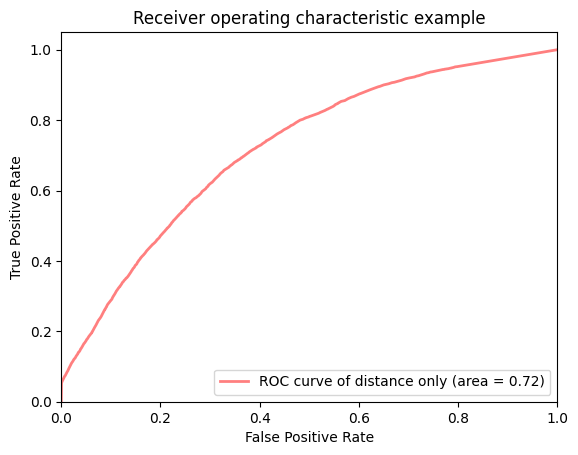

In [63]:
plt.figure()
lw = 2
plt.plot(fpr,tpr,color="red",lw=lw,alpha=0.5,label="ROC curve of distance only (area = %0.2f)" % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

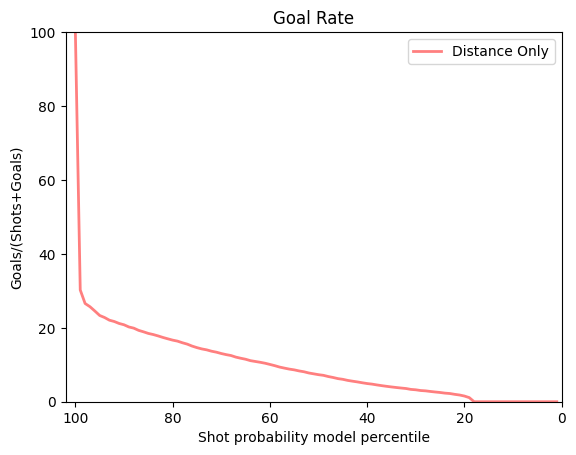

In [64]:
perc, perc_values, num_goals = get_percentile_goal_chance(pred[:,1], y_val)
plt.figure()
lw = 2
goal_rate = [i*100 for i in perc_values]
plt.plot(perc,goal_rate,color="red",alpha=0.5,lw=lw,label="Distance Only")
plt.xlim([102, 0])
plt.ylim([0, 100])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Goals/(Shots+Goals)")
plt.title("Goal Rate")
plt.legend(loc="upper right")
plt.show()

In [66]:
exp.log_metric("roc", roc_auc)
exp.end

<bound method BaseExperiment.end of <comet_ml._online.Experiment object at 0x00000237E5137400>>

In [67]:
exp.end

<bound method BaseExperiment.end of <comet_ml._online.Experiment object at 0x00000237E5137400>>